# CSX46
## Class session 6:  BFS

Objective: write and test a function that can compute single-vertex shortest paths in an unweighted simple graph. Compare to the results that we get using `igraph.Graph.get_shortest_paths()`.

We're going to need several packages for this notebook; let's import them first

In [1]:
import random
import igraph
import numpy as np
import math
import collections

Let's set the random number seed using `random.seed` and with seed value 1337, so that we are all starting with the same graph structure. Make a simple 10-vertex random (Barabasi-Albert model) graph.  Set the random number seed so that the graph is always the same, for purposes of reproducibility (we want to know that the "hub" vertex will be vertex 2, and we will test your BFS function starting at that "hub" vertex).

Let's plot the graph, using `bbox=[0,0,200,200]` so it is not huge, and using `vertex_label=` to display the vertex IDs.

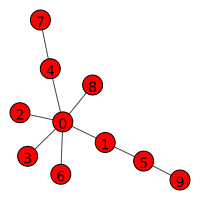

Let's look at an adjacency list representation of the graph, using the method `igraph.Graph.get_adjlist`

Let's look at the degrees of the vertices using the `igraph.Graph.degree` method and the `enumerate` built-in function and list comprehension: 

[{'vertex': 0, 'degree': 6},
 {'vertex': 1, 'degree': 2},
 {'vertex': 2, 'degree': 1},
 {'vertex': 3, 'degree': 1},
 {'vertex': 4, 'degree': 2},
 {'vertex': 5, 'degree': 2},
 {'vertex': 6, 'degree': 1},
 {'vertex': 7, 'degree': 1},
 {'vertex': 8, 'degree': 1},
 {'vertex': 9, 'degree': 1}]

OK, let's implement a function to compute shortest-path (geodesic path) distances to all vertices in the graph, starting at a single vertex `p_vertex`. We'll implement the 
breadth-first search (BFS) algorithm in order to compute these geodesic path distances. 

We'll start by implementing the queue data structure "by hand" with our own `read_ptr` and `write_ptr` exactly as described on page 320 of Newman's book. Newman says to use an "array" to implement the queue. As it turns out, Python's native `list` data type is internally implemented as a (resizeable) array, so we can just use a `list` here. We'll call our function `bfs_single_vertex_newman`.

In [6]:
# compute N, the number of vertices by calling len() on the VertexSet obtained from graph.vs()
# initialize "queue" array (length N, containing np.nan)
# initialize distances array (length N, containing np.nan)
# set "p_vertex" entry of distances array to be 0
# while write_ptr is gerater than read_ptr:
# obtain the vertex ID of the entry at index "read_ptr" in the queue array, as cur_vertex_num
# increment read_ptr
# get the distance to cur_vertex_num, from the "distances" array
# get the neighbors of vertex cur_vertex_num in the graph, using the igraph "neighbors" func
# for each vertex_neighbor in the array vertex_neighbors
#    if the distances[vertex_neighbor] is nan:
#         (1) set the distance to vertex_neighbor (in "distances" vector) to the distance to
#           cur_vertex_num, plus one
#         (2) add neighbor to the queue
#         put vertex_neighbor at position write_ptr in the queue array
#         increment write_ptr
# end-while
# return "distances"



Let's test out our implementation of `bfs_single_vertex_newman`, on vertex 0 of the graph. Do the results make sense?

[0, 1, 1, 1, 1, 2, 1, 2, 1, 3]

Now let's re-implement the single-vertex BFS distance function using a convenient queue data structure, `collections.deque` (note, `deque` is actually a *double-ended* queue, so it is a bit more fancy than we need, but that's OK, we just will only be using its methods `popleft` and `append`)

In [8]:
# compute N, the number of vertices by calling len() on the VertexSet obtained from graph.vs()
# create a deque data structure called "queue" and initialize it to contain p_vertex
# while the queue is not empty:
#     pop vertex_id off of the left of the queue
#     get the vertex_id entry of the distances vector, call it "vertex_dist"
#     for each neighbor_id of vertex_id:
#         if the neighbor_id entry of the distances vector is nan:
#             set the neighbor_id entry of the distances vector to vertex_dist + 1
#             append neighbor_id to the queue
# return "distances"



Compare the code implementations of `bfs_single_vertex_newman` and `bfs_single_vertex`. Which is easier to read and understand?

Test out your function `bfs_single_vertex` on vertex 0. Do we get the same result as when we used `bfs_single_vertex_newman`?

[0, 1, 1, 1, 1, 2, 1, 2, 1, 3]

If the graph was a lot bigger, how could we systematically check that the results of `bfs_single_vertex` (from vertex 0) are correctly calculated? We can use the `igraph.Graph.get_shortest_paths` method, and specify `v=0`. Let's look at the results of calling `get_shortest_paths` with `v=0`:

[[0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 1, 5],
 [0, 6],
 [0, 4, 7],
 [0, 8],
 [0, 1, 5, 9]]

So, clearly, we need to calculate the length of the list of vertices in each entry of this ragged list. But the *path* length is one less than the length of the list of vertices, so we have to subtract one in order to get the correct path length. Now we are ready to compare our BFS-based single-vertex geodesic distances with the results from calling `igraph.Graph.get_shortest_paths`:

True

Now let's implement a function that can compute a numpy.matrix of geodesic path distances for all pairs of vertices. The pythonic way to do this is probably to use the list-of-lists constructor for np.array, and to use list comprehension.

In [12]:
def sp_matrix(p_graph):
    return FILL IN HERE

How about if we want to implement it using a plain old for loop?

In [13]:
def sp_matrix_forloop(p_graph):
    N = FILL IN HERE
    geo_dists = FILL IN HERE
    FILL IN HERE
    return geo_dists

Let's run it on our little ten-vertex graph:

array([[0, 1, 1, 1, 1, 2, 1, 2, 1, 3],
       [1, 0, 2, 2, 2, 1, 2, 3, 2, 2],
       [1, 2, 0, 2, 2, 3, 2, 3, 2, 4],
       [1, 2, 2, 0, 2, 3, 2, 3, 2, 4],
       [1, 2, 2, 2, 0, 3, 2, 1, 2, 4],
       [2, 1, 3, 3, 3, 0, 3, 4, 3, 1],
       [1, 2, 2, 2, 2, 3, 0, 3, 2, 4],
       [2, 3, 3, 3, 1, 4, 3, 0, 3, 5],
       [1, 2, 2, 2, 2, 3, 2, 3, 0, 4],
       [3, 2, 4, 4, 4, 1, 4, 5, 4, 0]])